In [8]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KDTree
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df = pd.DataFrame(columns=['Question1','Direction1'])
df.head()

,Question1,Direction1


In [9]:
for i in range(1,44):
    data_pr149 = pd.read_csv('{}.csv'.format(i))
    data_pr149.describe()

    filter_data = data_pr149[data_pr149['Valid'] ==1]
    filter_data = filter_data.drop('Valid', 1)
    
    #filter_data = data_pr149[data_pr149['QuestionId'] ==1]

    filter_data['FpogX'] = filter_data['FpogX']*1920
    filter_data['FpogY'] = filter_data['FpogY']*1080
    filter_data.describe()
    
    diff_x = np.diff(filter_data['FpogX'])
    diff_y = np.diff(filter_data['FpogY'])
    filter_data.drop(filter_data.tail(1).index,inplace=True)
    filter_data.insert(4,'sd',np.sqrt(np.power(diff_x,2) + np.power(diff_y,2)))

    sa = np.arctan2(diff_x,diff_y);
    sa_deg = []
    for j in sa:
        sa_deg.append(math.degrees(j))

    filter_data.insert(5,'sa',sa_deg)
    
    directions = []
    for j in filter_data['sa']:
        if j < 135 and j >=45:
            directions.append('c')
        elif (j< 45 and j>=0) or (j >=-45 and j<0):
            directions.append('b')
        elif j>= -135 and j<-45:
            directions.append('a')
        elif (j<-135 and j >=-180) or (j >=135 and j<=180):
            directions.append('d')
        else :
            print(i);

    filter_data.insert(6,'Direction',directions)
    filter_data.to_csv(path_or_buf='New_{}.csv'.format(i))
    
    filter_data.head()

In [10]:
for i in range(1,44):
    
    ds = []
    xs = []
    ys = []

    for i in range(0,len(filter_data[filter_data['QuestionId']==1])):
        x = filter_data.iloc[i,2]
        y = filter_data.iloc[i,3]
        sd = filter_data.iloc[i,4]
        if  directions[i] != directions[i+1] :
            ds.append(directions[i])
            xs.append(x)
            ys.append(y)
    df = df.append({'Question1': top_k(ds,3)}, ignore_index=True) 

[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd', 'ab', 'cb', 'bc', 'ba']
[192, 169, 160, 154, 153]
['cd'

In [11]:
for i in range(1,44):
    data_pr149 = pd.read_csv('{}.csv'.format(i))
    data_pr149.describe()

    filter_data = data_pr149[data_pr149['Valid'] ==1]
    filter_data = filter_data.drop('Valid', 1)

    filter_data['FpogX'] = filter_data['FpogX']*1920
    filter_data['FpogY'] = filter_data['FpogY']*1080
    filter_data.describe()
    
    diff_x = np.diff(filter_data['FpogX'])
    diff_y = np.diff(filter_data['FpogY'])
    filter_data.drop(filter_data.tail(1).index,inplace=True)
    filter_data.insert(4,'sd',np.sqrt(np.power(diff_x,2) + np.power(diff_y,2)))

    sa = np.arctan2(diff_x,diff_y);
    sa_deg = []
    for i in sa:
        sa_deg.append(math.degrees(i))

    filter_data.insert(5,'sa',sa_deg)
    
    directions = []
    for i in filter_data['sa']:
        if i < 135 and i >=45:
            directions.append('c')
        elif (i< 45 and i>=0) or (i >=-45 and i<0):
            directions.append('b')
        elif i>= -135 and i<-45:
            directions.append('a')
        elif (i<-135 and i >=-180) or (i >=135 and i<=180):
            directions.append('d')
        else :
            print(i);

    filter_data.insert(6,'Direction',directions)
    filter_data.to_csv(path_or_buf='{}.csv'.format(i))
    
    ds = []
    xs = []
    ys = []
    flag = -1;
    for i in range(0,len(directions)):
        x = filter_data.iloc[i,2]
        y = filter_data.iloc[i,3]
        sd = filter_data.iloc[i,4]
        
        if x > 625.0 and x < 1289.0 and y > 112.0 and y < 175.0:
            if flag != 1:
                xs.append((1289.0+625.0)/2);
                ds.append(directions[i])
                ys.append((112.0+175.0)/2);
                flag = 1;
                print('Naslov');
        elif x > 223.0 and x < 708.0 and y > 210.0 and y < 482.0:
            if flag != 2:
                xs.append((223.0+708.0)/2);
                ds.append(directions[i])
                ys.append((210.0+482.0)/2);
                flag = 2; 
                print('Lav Slika');
        elif x > 223.0 and x < 708.0 and y > 498.0 and y < 585.0:
            if flag != 3:
                xs.append((223.0+708.0)/2);
                ds.append(directions[i])
                ys.append((498.0+585.0)/2);
                flag = 3;
                #print('Lav');
        elif x > 1234.0 and x < 1719.0 and y > 210.0 and y < 482.0:
            if flag != 4:
                xs.append((1234.0+1719.0)/2);
                ds.append(directions[i])
                ys.append((210.0+482.0)/2);
                flag = 4;
                #print('Medved Slika');
        elif x > 1234.0 and x < 1719.0 and y > 498.0 and y < 585.0:
            if flag != 5:
                xs.append((1234.0+1719.0)/2);
                ys.append((498.0+585.0)/2);
                flag = 5;
                ds.append(directions[i])
                #print('Medved');
        elif x > 223.0 and x < 708.0 and y > 596.7 and y < 919.0:
            if flag != 6:
                xs.append((223.0+708.0)/2);
                ys.append((597.0+919.0)/2);
                flag = 6;
                ds.append(directions[i])
                #print('Nilski Slika');
        elif x > 223.0 and x < 708.0 and y > 925.0 and y < 1010.96:
            if flag != 7:
                xs.append((223.0+708.0)/2);
                ys.append((925.0+1013.0)/2);
                flag = 7;
                ds.append(directions[i])
                #print('Nilski');
        elif x > 1234.0 and x < 1719.0 and y > 597.0 and y < 919.0:
            if flag != 8:
                xs.append((1234.0+1719.0)/2);
                ys.append((597.0+919.0)/2);
                flag = 8;
                ds.append(directions[i])
                #print('Slon Slika');
        elif x > 1234.0 and x < 1719.0 and y > 925.0 and y < 1011.0:
            if flag != 9:
                xs.append((1234.0+1719.0)/2);
                ys.append((925.0+1011.0)/2);
                flag = 9;
                ds.append(directions[i])
                #print('Slon');
      
    df = df.append({'Question1': top_k(ds,4)}, ignore_index=True) 

Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
[360, 305, 240, 228, 222]
['bcd', 'aab', 'bab', 'cdc', 'abc']
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Naslov
Naslov
Naslov
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslo

Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
[682, 640, 612, 576, 570]
['bbd', 'aba', 'ada', 'ddd', 'dd']
Naslov
Naslov
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
[248, 165, 162, 159, 153]
['ddb', 'cac', 'dd', 'acd', 'add']
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslo

[430, 375, 336, 324, 310]
['aab', 'bbb', 'abb', 'bb', 'bdb']
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Naslov
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
[448, 440, 429, 364, 360]
['cab', 'cdd', 'bcd', 'abb', 'ddb']
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Naslov
Naslov
Lav Slika
Naslov
Naslov
Lav Slika
Lav S

Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Lav Slika
[355, 343, 342, 330, 306]
['ddd', 'abc', 'dcb', 'ccc', 'bc']
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Naslov
Lav Slika
Naslov
Naslov
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Naslov
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
[406, 375, 335, 325, 315]
['cdd', 'dcd', 'ada', 'dba', 'aad']
Naslov
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav Slika
Lav Slika
Naslov
Lav Slika
Lav

In [ ]:
df.to_csv(path_or_buf='directionsQ1.csv')

In [20]:
a = df.iloc[1:44,0]
display(df)
#display(a)
unique = []
for i in a:
    for j in i:
        unique.append(j)
        
unique = np.unique(unique)
#display(unique)

res = []
b = []
for i in range(0,len(df['Question1'])):
    for j in unique:
        if j in  df.iloc[i,0]:
            res.append(1)
        else:
            res.append(0)
    
    df.iloc[i,1] = res
    res = []


,Question1,Direction1
0,"[cd, ab, cb, bc, ba]","[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]"
1,"[cd, ab, cb, bc, ba]","[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]"
2,"[cd, ab, cb, bc, ba]","[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]"
3,"[cd, ab, cb, bc, ba]","[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]"
4,"[cd, ab, cb, bc, ba]","[0, 1, 0, 1, 0, 1, 0, 1, 1, 0]"
...,...,...
81,"[caa, bbc, aac, bdb, bb]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
82,"[aac, cab, abd, bca, bba]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
83,"[ddd, abc, dcb, ccc, bc]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]"
84,"[cdd, dcd, ada, dba, aad]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [13]:
plt.figure(figsize=(19.20,10.80))
img = mpimg.imread('E:/1.png');
ax = plt.gca();
ax.set_ylim(ax.get_ylim()[::-1]);
imgplot = plt.imshow(img);
plt.scatter(xs,ys,s=100);
plt.plot(xs,ys, c='r');

plt.xticks(np.arange(0, 1920, step=100));
plt.yticks(np.arange(0, 1080, step=100));

FileNotFoundError: [Errno 2] No such file or directory: 'E:/1.png'

<Figure size 1382.4x777.6 with 0 Axes>

In [22]:
from sklearn.decomposition import PCA
emb = []

for i in df['Direction1']:
    emb.append(i)
print(emb)
pca = PCA(n_components=3)
pca.fit(emb)
X = pca.transform(emb)
print(np.sum(pca.explained_variance_ratio_))
X

[[0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 

array([[-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05, -1.35955660e-03],
       [-1.10134613e+00, -3.30749215e-05

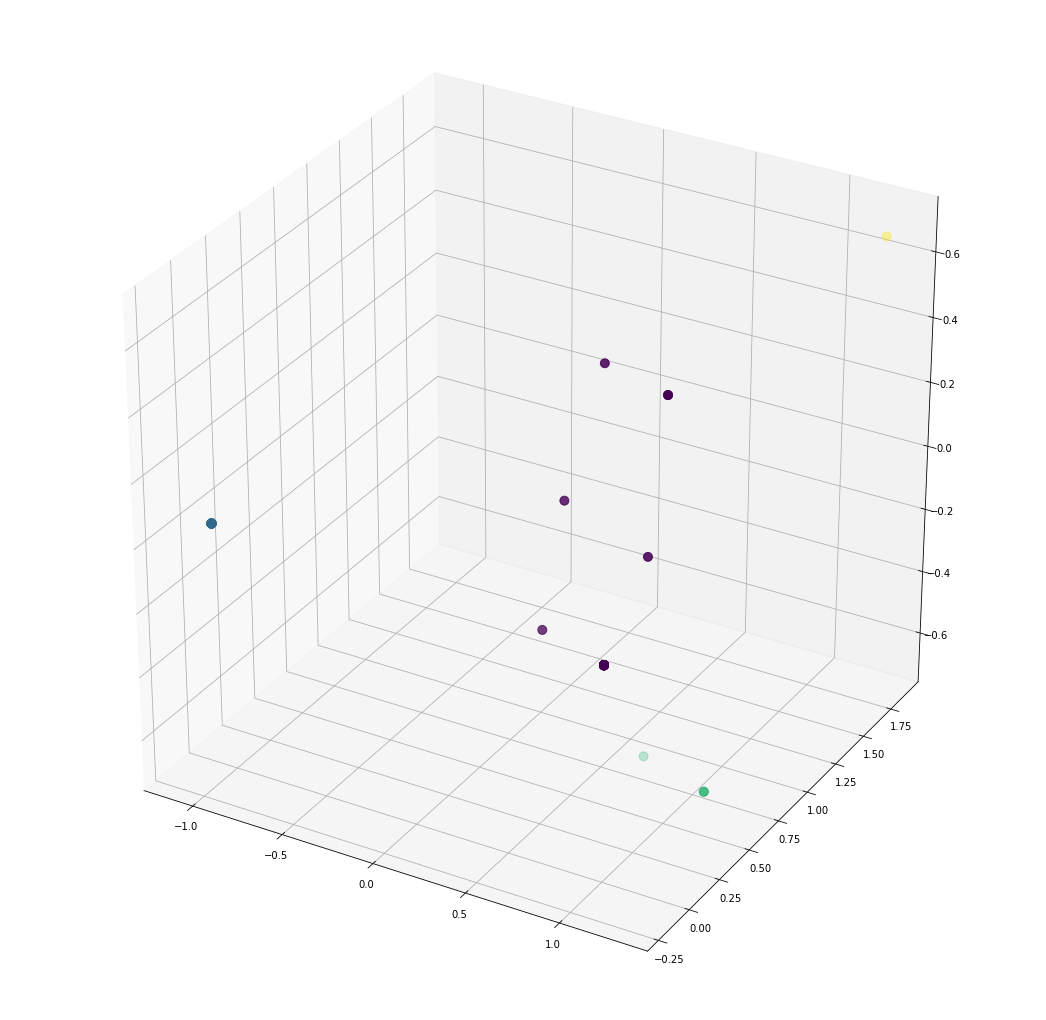

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)
ax = fig.add_subplot(111, projection='3d')
colmap = {1: 'r', 2: 'g', 3: 'b'}
#ax.plot(fpog_x, fpog_y, time,  c='r', marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2],s=80,  c=labels)
#diff_x = np.diff(fpog_x)  
#diff_y = np.diff(fpog_y)

In [6]:
def top_k(MA, alfa):  
    MAsub = []
    sequencelist = []
    FMA = []
    MAfreqsub = []
    cnt = 0;
    for i in range(1,alfa):
        for j in range(0,len(MA)-alfa):

            temp = ''.join(MA[j:j+i]);
            if  temp in sequencelist:
                   cnt =cnt
            else:
                MAsub.append(temp)
                sequencelist.append( MAsub[-1]);
                cnt=cnt+1;
                MAfreqsub.append(isSubArray(MA,MAsub[-1],len(MA),len(MAsub[-1]))*len(MAsub));

    for i in range(0,len(MAsub)-1):
        for j in range(i+1,len(MAsub)):
            if MAfreqsub[i] < MAfreqsub[j]:
                temp = MAfreqsub[i]
                MAfreqsub[i] = MAfreqsub[j]
                MAfreqsub[j] = temp
                temp = MAsub[i]
                MAsub[i] = MAsub[j]
                MAsub[j] = temp

    print(MAfreqsub[0:5])    
    print(MAsub[0:5])

    return MAsub[0:5]

In [7]:
def isSubArray(A, B, n, m): 
    cnt= 0;
    # Two pointers to traverse the arrays 
    i = 0
    j = 0
  
    # Traverse both arrays simultaneously 
    while (i < n and j < m): 
          
        # If element matches increment  
        # both pointers 
        if (A[i] == B[j]): 
            i += 1
            j += 1
  
            # If array B is completely 
            # traversed 
            if (j == m): 
                cnt+=1;
                i += 1
                j = 0
      
        # If not, increment i and reset j 
        else: 
            i += 1
            j = 0
  
    return cnt